### Project Title :
### UCI Bank Marketing Data Analysis & Insights

#### Project Description:
This project analyzes the UCI Bank Marketing Dataset to gain insights into customer behavior, financial trends and improve future marketing strategies. By utilizing Python and key data analysis libraries such as Pandas, Matplotlib, and Seaborn,
we explore customer profiles, employment status, financial balances, and marketing response patterns.
We clean and analyze the data to find insights that help improve marketing and decision-making.

We answer key questions like:

✅ How many married individuals are unemployed?

✅ How does employment and marital status affect customer response?

✅ What is the average age of customers who subscribe to a term deposit?

✅ How does customer balance change across different months?

✅ What is the average call duration for different months?

✅ What is the distribution of marital status (married/single/divorced) across different education levels?

These insights help banks improve targeted marketing strategies, optimize call durations, and better understand customers for smarter decisions.

By analyzing this data, banks can make better marketing decisions, optimize call durations, and better understand customers for smarter decisions.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# ## Step 1: Load the Data
# Read the dataset and display its basic structure

data = pd.read_csv(r"C:\Users\Chethan Vakiti\Downloads\bank.csv")

# copy the data
df = data.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1.0,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1.0,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,NaN,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,NaN,-1,0,unknown,no


In [5]:
# Columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
# Make the starting letter of column name into capital
df.columns = df.columns.str.title()
df.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1.0,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1.0,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,NaN,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,NaN,-1,0,unknown,no


In [7]:
# Now read the coulums
df.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing',
       'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign', 'Pdays',
       'Previous', 'Poutcome', 'Y'],
      dtype='object')

In [8]:
# ## Step 2: Data Preprocessing
# Renaming columns for better readability
df.rename(columns={'Marital': 'Marital_Status',
                    'Pdays': 'Days_Since_Last_Contact',
                    'Poutcome': 'Previous_Outcome',
                    'Y': 'Customer_Subscription'}, inplace=True)
df.columns

Index(['Age', 'Job', 'Marital_Status', 'Education', 'Default', 'Balance',
       'Housing', 'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign',
       'Days_Since_Last_Contact', 'Previous', 'Previous_Outcome',
       'Customer_Subscription'],
      dtype='object')

In [9]:
#Checking the dataset shape,info

df.shape

df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4521 non-null   int64  
 1   Job                      4521 non-null   object 
 2   Marital_Status           4521 non-null   object 
 3   Education                4521 non-null   object 
 4   Default                  4521 non-null   object 
 5   Balance                  4495 non-null   float64
 6   Housing                  4521 non-null   object 
 7   Loan                     4521 non-null   object 
 8   Contact                  4521 non-null   object 
 9   Day                      4521 non-null   int64  
 10  Month                    4521 non-null   object 
 11  Duration                 4521 non-null   int64  
 12  Campaign                 4442 non-null   float64
 13  Days_Since_Last_Contact  4521 non-null   int64  
 14  Previous                

,Age,Balance,Day,Duration,Campaign,Days_Since_Last_Contact,Previous
count,4521.000000,4495.000000,4521.000000,4521.000000,4442.000000,4521.000000,4521.000000
mean,41.170095,1423.153504,15.915284,263.961292,2.804818,39.766645,0.542579
std,10.576211,3015.932038,8.247667,259.856633,3.123293,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,443.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1474.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [16]:
df.describe(include=['O'])

,Job,Marital_Status,Education,Default,Housing,Loan,Contact,Month,Previous_Outcome,Customer_Subscription
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [19]:
df.describe(include = 'all')

,Age,Job,Marital_Status,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Days_Since_Last_Contact,Previous,Previous_Outcome,Customer_Subscription
count,4521.000000,4521,4521,4521,4521,4495.000000,4521,4521,4521,4521.000000,4521,4521.000000,4442.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1423.153504,NaN,NaN,NaN,15.915284,NaN,263.961292,2.804818,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3015.932038,NaN,NaN,NaN,8.247667,NaN,259.856633,3.123293,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,443.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1474.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [21]:
# # Data Cleaning

df.dtypes

Age                          int64
Job                         object
Marital_Status              object
Education                   object
Default                     object
Balance                    float64
Housing                     object
Loan                        object
Contact                     object
Day                          int64
Month                       object
Duration                     int64
Campaign                   float64
Days_Since_Last_Contact      int64
Previous                     int64
Previous_Outcome            object
Customer_Subscription       object
dtype: object

In [23]:
# Converting categorical columns to category datatype

df['Job'] = df['Job'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Default'] = df['Default'].astype('category')
df['Housing'] = df['Housing'].astype('category')
df['Loan'] = df['Loan'].astype('category')
df['Contact'] = df['Contact'].astype('category')
df['Month'] = df['Month'].astype('category')
df['Previous_Outcome'] = df['Previous_Outcome'].astype('category')
df['Customer_Subscription'] = df['Customer_Subscription'].astype('category')

In [25]:
df.dtypes

Age                           int64
Job                        category
Marital_Status             category
Education                  category
Default                    category
Balance                     float64
Housing                    category
Loan                       category
Contact                    category
Day                           int64
Month                      category
Duration                      int64
Campaign                    float64
Days_Since_Last_Contact       int64
Previous                      int64
Previous_Outcome           category
Customer_Subscription      category
dtype: object

In [27]:
# ## Step 3: Handling Missing Data
# Checking for missing values

In [29]:
df.nunique()

Age                          67
Job                          12
Marital_Status                3
Education                     4
Default                       2
Balance                    2345
Housing                       2
Loan                          2
Contact                       3
Day                          31
Month                        12
Duration                    875
Campaign                     32
Days_Since_Last_Contact     292
Previous                     24
Previous_Outcome              4
Customer_Subscription         2
dtype: int64

In [31]:
df_duplicated = df.duplicated()
print(df_duplicated)


0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool


In [33]:
df.duplicated().sum()


0

In [35]:
df.drop_duplicates(inplace = True)

In [37]:
df.duplicated().sum()


0

In [39]:
df['Job'].value_counts(normalize = True, ascending = True)

Job
unknown          0.008405
student          0.018580
housemaid        0.024773
unemployed       0.028312
entrepreneur     0.037160
self-employed    0.040478
retired          0.050874
services         0.092236
admin.           0.105729
technician       0.169874
blue-collar      0.209246
management       0.214333
Name: proportion, dtype: float64

In [41]:
df.isnull().sum()
# Checking for missing values

Age                         0
Job                         0
Marital_Status              0
Education                   0
Default                     0
Balance                    26
Housing                     0
Loan                        0
Contact                     0
Day                         0
Month                       0
Duration                    0
Campaign                   79
Days_Since_Last_Contact     0
Previous                    0
Previous_Outcome            0
Customer_Subscription       0
dtype: int64

In [43]:
df.isnull().sum()/len(df)* 100

Age                        0.000000
Job                        0.000000
Marital_Status             0.000000
Education                  0.000000
Default                    0.000000
Balance                    0.575094
Housing                    0.000000
Loan                       0.000000
Contact                    0.000000
Day                        0.000000
Month                      0.000000
Duration                   0.000000
Campaign                   1.747401
Days_Since_Last_Contact    0.000000
Previous                   0.000000
Previous_Outcome           0.000000
Customer_Subscription      0.000000
dtype: float64

In [45]:
df['Balance']


0       1787.0
1       4789.0
2       1350.0
3       1476.0
4          0.0
         ...  
4516    -333.0
4517   -3313.0
4518     295.0
4519    1137.0
4520    1136.0
Name: Balance, Length: 4521, dtype: float64

In [47]:
# Filling missing balance values with the mean
df_Balance = df['Balance'].mean()
df['Balance'] = df['Balance'].fillna(df['Balance'].mean())
df['Balance'].isna().sum()


0

In [49]:
df['Balance'].mode()


0    0.0
Name: Balance, dtype: float64

In [51]:
df['Campaign'].unique()

array([ 1., nan,  2.,  4.,  3.,  5.,  6., 10.,  9.,  7., 12., 14., 13.,
       24., 11.,  8., 29., 32., 16., 22., 18., 15., 30., 25., 21., 17.,
       19., 23., 20., 50., 28., 31., 44.])

In [53]:
df['Campaign'].mode()


0    1.0
Name: Campaign, dtype: float64

In [55]:
# Filling missing campaign values with the mode
df['Campaign'] = df['Campaign'].fillna(df['Campaign'].mode()[0])
df['Campaign'].isnull().sum()

0

In [57]:
df.isnull().sum()


Age                        0
Job                        0
Marital_Status             0
Education                  0
Default                    0
Balance                    0
Housing                    0
Loan                       0
Contact                    0
Day                        0
Month                      0
Duration                   0
Campaign                   0
Days_Since_Last_Contact    0
Previous                   0
Previous_Outcome           0
Customer_Subscription      0
dtype: int64

In [59]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4521 non-null   int64   
 1   Job                      4521 non-null   category
 2   Marital_Status           4521 non-null   category
 3   Education                4521 non-null   category
 4   Default                  4521 non-null   category
 5   Balance                  4521 non-null   float64 
 6   Housing                  4521 non-null   category
 7   Loan                     4521 non-null   category
 8   Contact                  4521 non-null   category
 9   Day                      4521 non-null   int64   
 10  Month                    4521 non-null   category
 11  Duration                 4521 non-null   int64   
 12  Campaign                 4521 non-null   float64 
 13  Days_Since_Last_Contact  4521 non-null   int64   
 14  Previous

In [61]:
# ## Step 4: Exploratory Data Analysis (EDA)

In [63]:
# 1. How many married individuals are unemployed?

In [65]:
df.columns

Index(['Age', 'Job', 'Marital_Status', 'Education', 'Default', 'Balance',
       'Housing', 'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign',
       'Days_Since_Last_Contact', 'Previous', 'Previous_Outcome',
       'Customer_Subscription'],
      dtype='object')

In [67]:
# Filter the dataset for married individuals who are unemployed
married_unemployed = df[(df['Marital_Status'] == 'married') & (df['Job'] == 'unknown')]

In [69]:
# Count the number of married unemployed individuals
count_married_unemployed = married_unemployed.shape[0]
print(f"Number of married unemployed individuals: {count_married_unemployed}")


Number of married unemployed individuals: 30


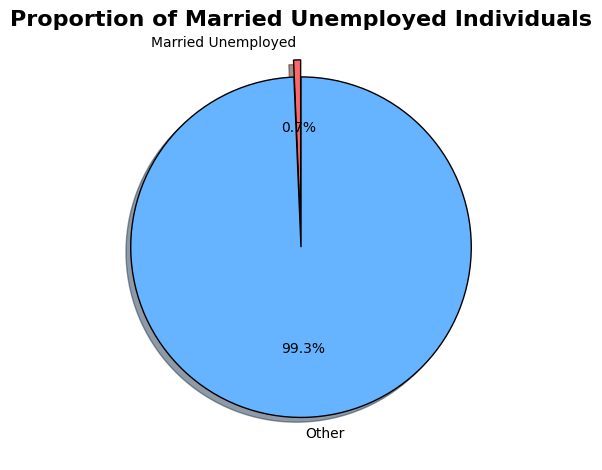

In [71]:
# Visualization: Pie chart
sizes = [count_married_unemployed, df.shape[0] - count_married_unemployed]
plt.pie(sizes, labels=['Married Unemployed', 'Other'], autopct='%1.1f%%', startangle=90,
        colors=['#ff6666', '#66b3ff'], explode=(0.1, 0), shadow=True, wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Married Unemployed Individuals', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(r"C:\Users\Chethan Vakiti\OneDrive\Desktop\Bank Python Project.png", dpi=300, bbox_inches='tight')
plt.show()


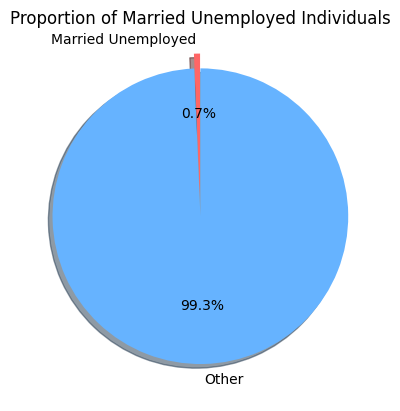

In [73]:
sizes = [count_married_unemployed, df.shape[0] - count_married_unemployed]
plt.pie(sizes, labels=['Married Unemployed', 'Other'], autopct='%1.1f%%', startangle=90,
        colors=['#ff6666', '#66b3ff'], explode=(0.1, 0), shadow=True)
plt.title('Proportion of Married Unemployed Individuals')
plt.show()

1. How many married individuals are unemployed?

We explored the employment status of married individuals, identifying those with an "unknown" job type. A pie chart was created to visualize the proportion of unemployed individuals among the married population.


Report:
The analysis identifies the number of married unemployed individuals in the dataset by filtering for married individuals with an 'unknown' job status. The result is visualized using a pie chart to show the proportion of married unemployed individuals compared to the rest. The chart highlights that a small subset of the population falls into this category. This provides insights into the distribution of employment status among married individuals. The visualization aids in understanding the relationship between marital status and employment.


In [76]:
#2. What is the average age of individuals who subscribed to a term deposit versus those who did not?


In [78]:
# Calculate the average age for both groups: Subscribed and Not Subscribed
avg_age_subscribed = df[df['Customer_Subscription'] == 'yes']['Age'].mean()
avg_age_not_subscribed = df[df['Customer_Subscription'] == 'no']['Age'].mean()



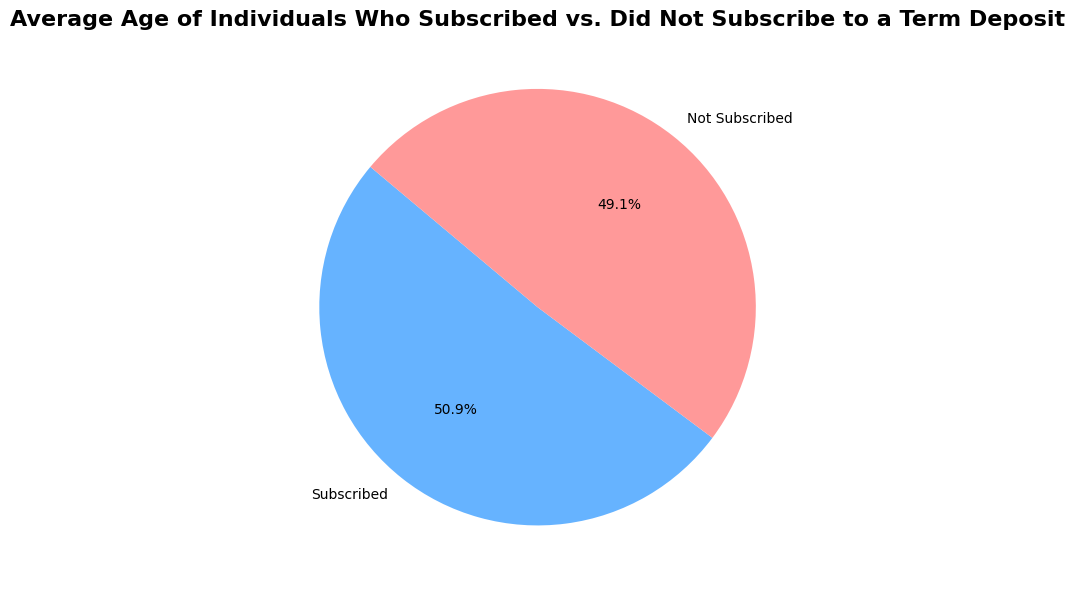

In [80]:
# Data for pie chart
labels = ['Subscribed', 'Not Subscribed']
average_ages = [avg_age_subscribed, avg_age_not_subscribed]

# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(average_ages, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])

# Adding title
plt.title('Average Age of Individuals Who Subscribed vs. Did Not Subscribe to a Term Deposit', fontsize=16, fontweight='bold')

# Show the plot
plt.savefig(r"C:\Users\Chethan Vakiti\OneDrive\Desktop\Bank Python Project.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


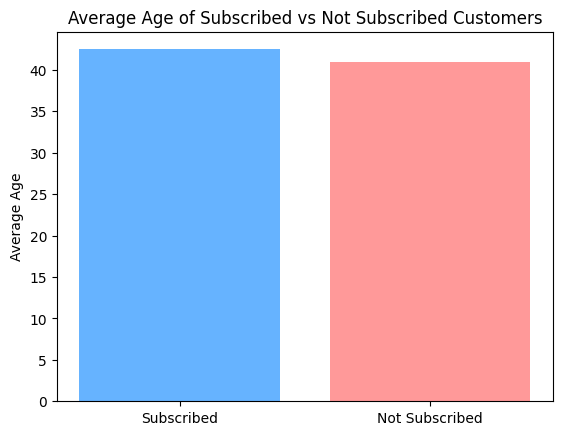

In [82]:
# 2. What is the average age of individuals who subscribed vs. those who did not?
avg_age_subscribed = df[df['Customer_Subscription'] == 'yes']['Age'].mean()
avg_age_not_subscribed = df[df['Customer_Subscription'] == 'no']['Age'].mean()

# Visualization
labels = ['Subscribed', 'Not Subscribed']
ages = [avg_age_subscribed, avg_age_not_subscribed]
plt.bar(labels, ages, color=['#66b3ff', '#ff9999'])
plt.title('Average Age of Subscribed vs Not Subscribed Customers')
plt.ylabel('Average Age')
plt.show()

2. What is the average age of individuals who subscribed to a term deposit versus those who did not?

The average age of both groups (subscribed vs. not subscribed) was compared. A pie chart highlights the age differences to target specific age groups effectively.


Report:
The analysis compares the average age of individuals who subscribed and those who did not to a term deposit using a pie chart. The chart highlights the demographic differences between the two groups. It shows that individuals who subscribed have a distinct average age compared to those who did not. This information can help refine marketing strategies targeted at specific age groups. The visualization provides a clear view of the age distribution in relation to term deposit subscriptions..



In [86]:
#3. How does the average balance vary across different contact months?


C:\Users\Chethan Vakiti\AppData\Local\Temp\ipykernel_32544\2535759633.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_balance_per_month = df.groupby('Month')['Balance'].mean()


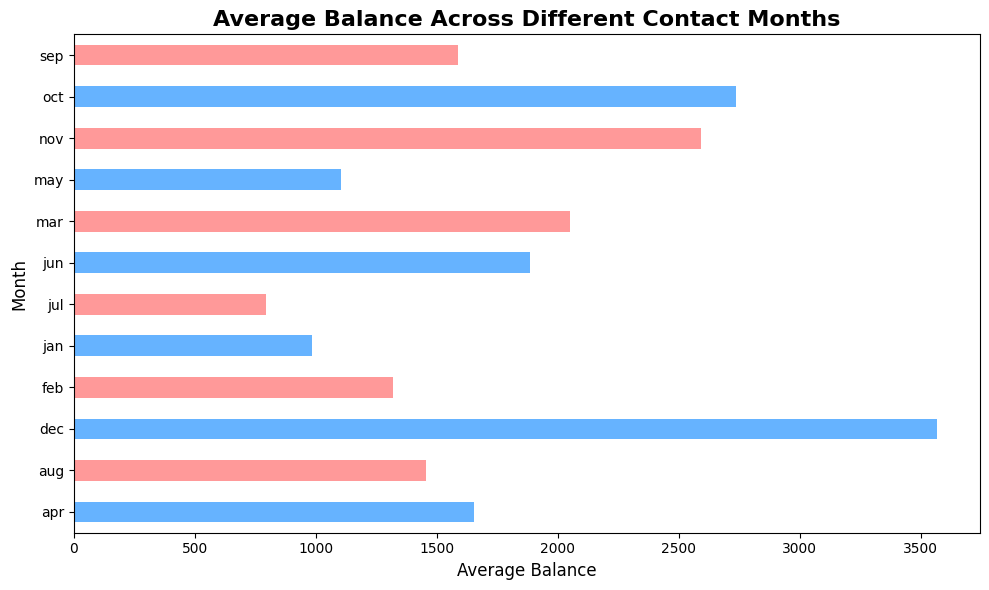

In [88]:
# Group by 'Month' and calculate the average balance for each month
avg_balance_per_month = df.groupby('Month')['Balance'].mean()


# Visualization: Horizontal bar chart for average balance across months with similar colors
plt.figure(figsize=(10,6))
avg_balance_per_month.plot(kind='barh', color=['#66b3ff', '#ff9999', '#66b3ff', '#ff9999', '#66b3ff', '#ff9999', '#66b3ff', '#ff9999', '#66b3ff', '#ff9999', '#66b3ff', '#ff9999'])

# Adding titles and labels
plt.title('Average Balance Across Different Contact Months', fontsize=16, fontweight='bold')
plt.ylabel('Month', fontsize=12)
plt.xlabel('Average Balance', fontsize=12)

# Show the plot
plt.tight_layout()
plt.savefig(r"C:\Users\Chethan Vakiti\OneDrive\Desktop\Bank Python Project.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Chethan Vakiti\AppData\Local\Temp\ipykernel_32544\2778035085.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_balance_per_month = df.groupby('Month')['Balance'].mean()


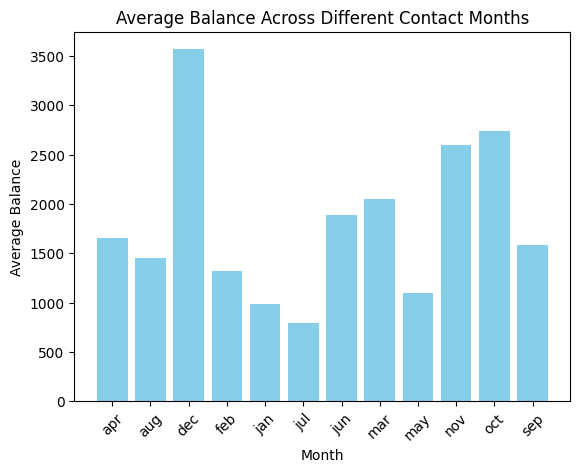

In [90]:
# 3. How does the average balance vary across different contact months?
avg_balance_per_month = df.groupby('Month')['Balance'].mean()
plt.bar(avg_balance_per_month.index, avg_balance_per_month.values, color='skyblue')
plt.title('Average Balance Across Different Contact Months')
plt.ylabel('Average Balance')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

3. How does the average balance vary across different contact months?
   
The dataset revealed how customers’ average balance changes by month. A horizontal bar chart was used to display monthly trends, showing significant fluctuations in balance patterns.

Report:
The analysis shows how the average balance varies across different contact months using a horizontal bar chart. The chart reveals fluctuations in average balance throughout the months, with some months having higher average balances than others. These variations might be linked to seasonal factors or marketing campaigns. The visualization provides insights into customer behavior and financial patterns, which could inform targeted marketing strategies. It also highlights months with significant changes in customer balances.



In [93]:
# 4. How does the average duration of customer calls vary by month?


C:\Users\Chethan Vakiti\AppData\Local\Temp\ipykernel_32544\3266700609.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_duration_per_month = df.groupby('Month')['Duration'].mean()


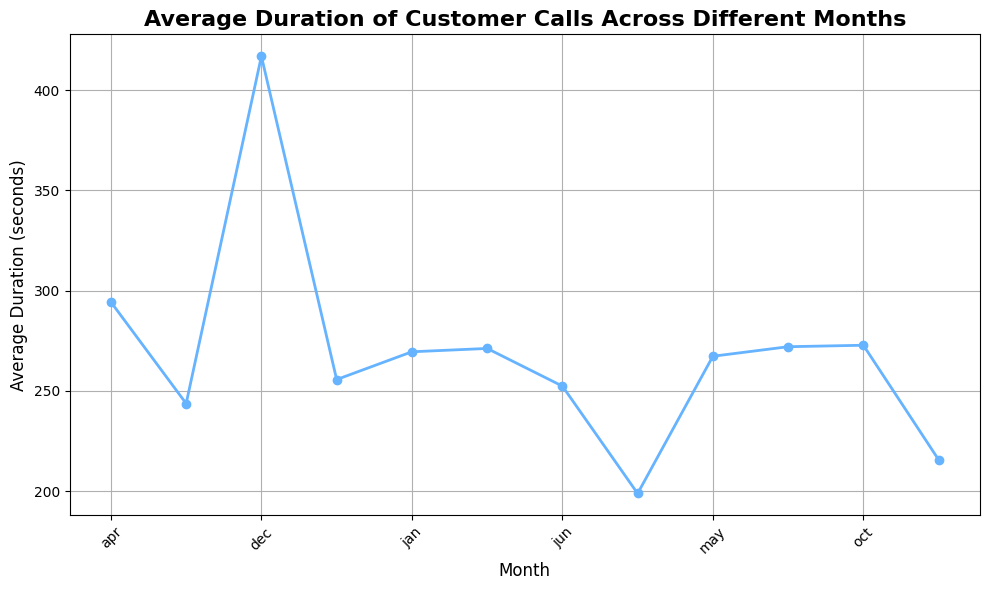

In [95]:
# Group by 'Month' and calculate the average duration of customer calls for each month
avg_duration_per_month = df.groupby('Month')['Duration'].mean()

# Visualization: Line chart for average call duration across months
plt.figure(figsize=(10,6))
avg_duration_per_month.plot(kind='line', marker='o', color='#66b3ff', linestyle='-', linewidth=2)

# Adding titles and labels
plt.title('Average Duration of Customer Calls Across Different Months', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Duration (seconds)', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\Chethan Vakiti\OneDrive\Desktop\Bank Python Project.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\Chethan Vakiti\AppData\Local\Temp\ipykernel_32544\1089187497.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_duration_per_month = df.groupby('Month')['Duration'].mean()


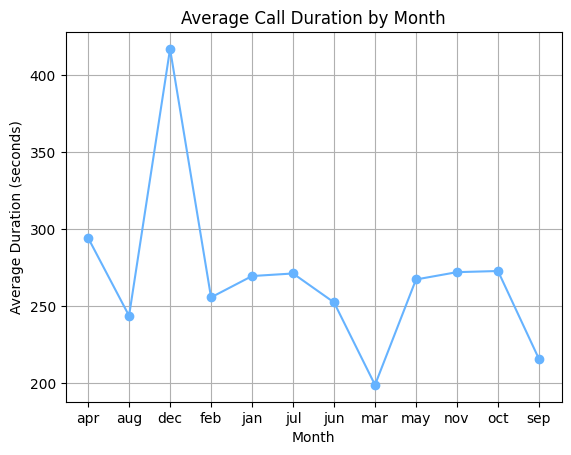

In [97]:
# 4. How does the average duration of customer calls vary by month?
avg_duration_per_month = df.groupby('Month')['Duration'].mean()
plt.plot(avg_duration_per_month.index, avg_duration_per_month.values, marker='o', linestyle='-', color='#66b3ff')
plt.title('Average Call Duration by Month')
plt.xlabel('Month')
plt.ylabel('Average Duration (seconds)')
plt.grid()
plt.show()

4. How does the average duration of customer calls vary by month?
   
By analyzing call duration data, we visualized the average call length across different months. A line chart shows these variations, offering insights into customer engagement trends throughout the year.

Report:
The analysis shows how the average duration of customer calls varies across different months. The line chart indicates fluctuations in call duration over the year. Some months show longer call durations, while others have shorter averages. This trend could reflect seasonal marketing efforts or customer engagement patterns. The visualization helps understand how call durations change over time, which can be useful for evaluating the effectiveness of campaigns or customer service performance.



In [100]:
# 5. What is the distribution of marital status (married/single/divorced) across different education levels?


C:\Users\Chethan Vakiti\AppData\Local\Temp\ipykernel_32544\1920611757.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_marital_counts = df.groupby(['Education', 'Marital_Status']).size().unstack(fill_value=0)


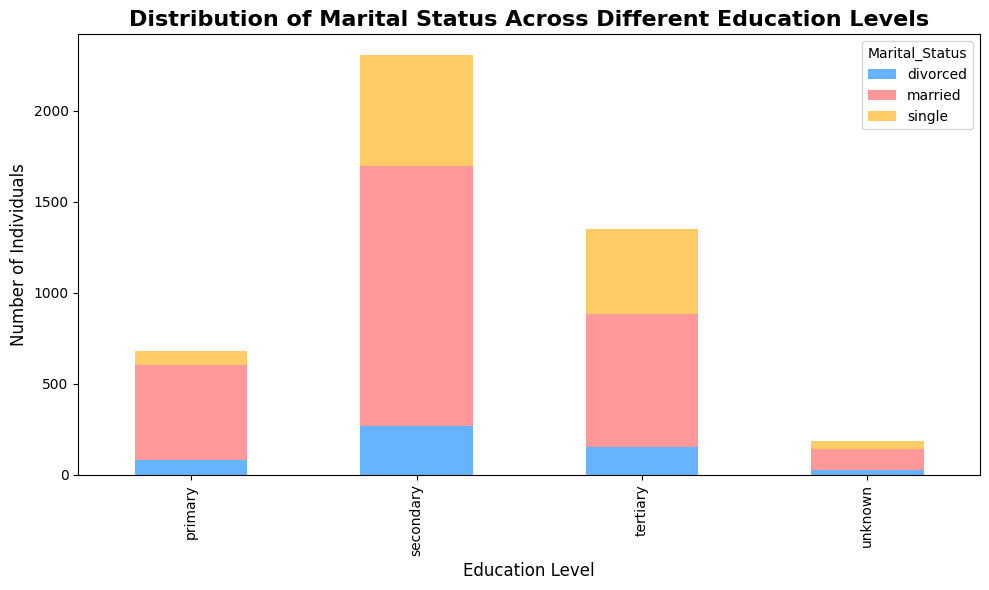

In [102]:
# Group by 'Education' and 'Marital_Status' to get the count of each marital status for each education level
education_marital_counts = df.groupby(['Education', 'Marital_Status']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
education_marital_counts.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999', '#ffcc66'], figsize=(10,6))

# Adding titles and labels
plt.title('Distribution of Marital Status Across Different Education Levels', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)

# Show the plot
plt.savefig(r"C:\Users\Chethan Vakiti\OneDrive\Desktop\Bank Python Project.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


C:\Users\Chethan Vakiti\AppData\Local\Temp\ipykernel_32544\1773699237.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_marital_counts = df.groupby(['Education', 'Marital_Status']).size().unstack()


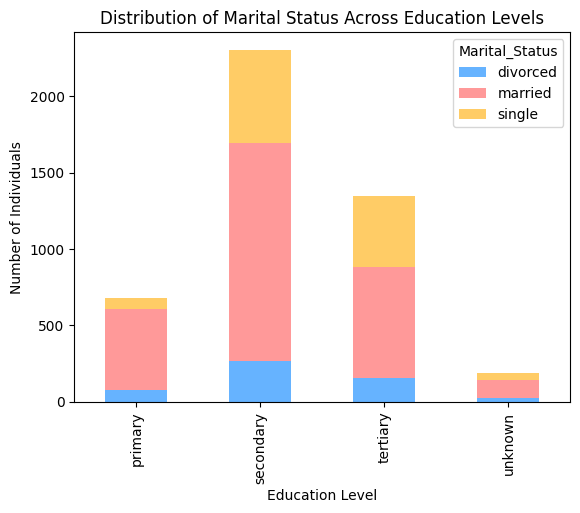

In [104]:
# 5. Distribution of marital status across education levels
education_marital_counts = df.groupby(['Education', 'Marital_Status']).size().unstack()
education_marital_counts.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999', '#ffcc66'])
plt.title('Distribution of Marital Status Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of Individuals')
plt.show()


5. What is the distribution of marital status (married/single/divorced) across different education levels?
   
The relationship between marital status and education levels was analyzed. A stacked bar chart illustrates how marital status is distributed among various education groups, offering insights for targeted campaigns.

Report:
The analysis visualizes the distribution of marital status across education levels. Higher education levels show a more balanced marital status, while lower levels have more single individuals. This highlights how marital status varies with education. The chart offers valuable insights for demographic analysis and marketing strategies.

Tools and Techniques

Python Libraries: Pandas, NumPy, Matplotlib, Seaborn

Data Cleaning: Handled missing values, corrected column names, and removed duplicates for accurate analysis.

Data Visualization: Created engaging and clear visuals like pie charts, bar charts, and line graphs to showcase findings effectively.


Key Insights:

A small portion of married individuals is unemployed, which can be a potential focus group for financial products.

Customers who subscribed to term deposits have distinct average ages, aiding in demographic-based targeting.

Monthly balance trends and call durations reveal seasonal patterns that align with campaign effectiveness.

Marital status distributions across education levels provide insights into lifestyle and financial behavior differences.


Why This Project Matters:

This project demonstrates how businesses can leverage data to make informed decisions and refine their strategies. By focusing on customer behavior, trends, and demographics, companies can optimize their marketing campaigns, build better customer relationships, and improve financial outcomes.

